In [66]:
import torch
import torchvision
from torch import nn
from torchvision import datasets,transforms
import torch.nn.functional as F
from torchvision import models
from torchsummary import summary

## In this we will also learn about the torch_snippets library

## VGG Architecture
* Visual Geometric Group

In [67]:
device='mps' if torch.backends.mps.is_available() else 'cpu'
print(device)

mps


In [68]:
model=models.vgg16(pretrained=True).to(device)
for param in model.parameters():
    param.requires_grad=False

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [69]:
summary(model,torch.zeros([1,3,224,224]))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [70]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [71]:
train_dir='/Users/chowdaryadithyasaividivada/Documents/Pytorch_book_practice/cat-and-dog/training_set/training_set'


In [72]:
import numpy as np
import pandas as pd
import cv2

In [73]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [74]:
from random import shuffle
torch.manual_seed(42)
class catsdogs(Dataset):
    def __init__(self,folder):
        cats=glob.glob(folder+'/cats/*.jpg')
        dogs=glob.glob(folder+'/dogs/*.jpg')
        self.fpaths=cats[:500]+dogs[:500]
        shuffle(self.fpaths)
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.targets=[fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths]
        
    def __getitem__(self,ix):
        image=self.fpaths[ix]
        image=cv2.imread(image)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(224,224))
        return torch.tensor(image/255).permute(2,0,1).float().to(device),torch.tensor([self.targets[ix]]).float().to(device)

    def __len__(self):
        return len(self.fpaths)

In [75]:
data=catsdogs(train_dir)

In [76]:
im,label=data[467]

tensor([1.], device='mps:0')


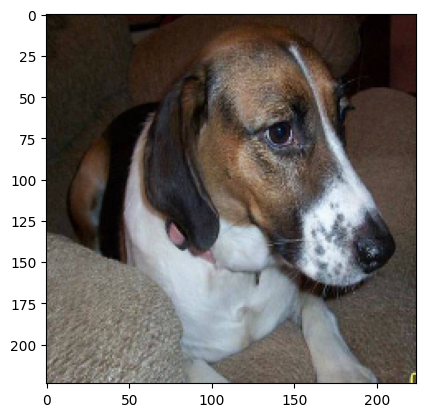

In [77]:
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [78]:
model.avgpool=nn.AdaptiveAvgPool2d(output_size=(1,1))


In [79]:
model.classifier=nn.Sequential(nn.Flatten(),
                            nn.Linear(512,128),
                            nn.ReLU(),
                            
                            nn.Linear(128,1),
                            nn.Sigmoid()).to(device)

In [80]:
loss_fn=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.00001, weight_decay=1e-4)


In [81]:
from torchsummary import summary

In [82]:
summary(model,torch.zeros([1,3,224,224]))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [83]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()
def train_batch(model,x,y,loss_fn,optimizer):
    model.train()
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

In [84]:
def get_data(train_dir):
    data=catsdogs(train_dir)
    dataload=DataLoader(dataset=data,batch_size=16,shuffle=True,drop_last=True)
    return dataload


In [89]:
l=[]
train_epoch_accuracies=[]
from tqdm.auto import tqdm
trnload=get_data(train_dir)
for i in tqdm(range(3)):
    for batch,(img,legend) in enumerate(trnload):
        loss=train_batch(model.to(device),img,legend,loss_fn,optimizer)
        l.append(loss)
        

    for ix, batch in enumerate(iter(trnload)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

  0%|          | 0/3 [00:00<?, ?it/s]

In [90]:
train_epoch_accuracy

0.9186827956989247

In [93]:
image='/Users/chowdaryadithyasaividivada/Downloads/images (8).jpeg'
image=cv2.imread(image)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(224,224))
image.shape

(224, 224, 3)

tensor([[0.0173]], device='mps:0')
tensor([[0.0173]], device='mps:0')
cat


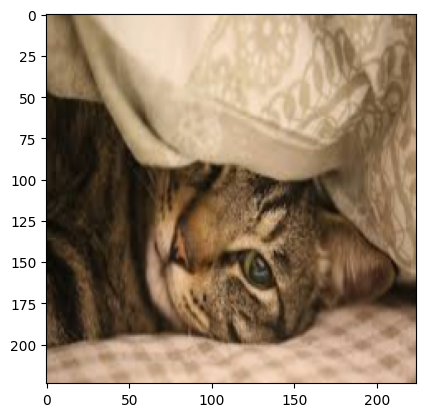

In [94]:
plt.imshow(image)
with torch.inference_mode():
    inputimg=torch.tensor(image).permute(2,0,1).float().to(device)
    y_pred=model(inputimg.unsqueeze(0))
    print(y_pred)
print(y_pred)
if(y_pred>0.5):
    print('DOG')
else:
    print('cat')
